# Data Hackerspace 'Midterm'
** 15 points total **

These problems are designed to be a bit different from the previous 'challenge' problems. Instead of instructing you to do something very specific, these problems are more general and approach-driven (like something you'd see on an actual interview, or in a Data Science job).

Thus, the process of completing these problems is just as important as the 'correctness' of the answers. These questions are also a bit more open ended. Make the assumptions that you think are valid, and be sure to **comment in** those assumptions in your code.

* Due Date: **November 29th, 11:59pm. No late Submissions.**
* Credit is given for both accuracy, and a thoughtful algorithmic approach.
* Submit this assignment emailing your completed `*.ipynb` to Tyler using the email we gave you in class (Keep your output!)

## Problem 1: Email Address Matching
** 4 points **

You are given a list of names and a list of email addresses.  How would you automatically assign the 'best' email from the list of emails to the corresponding name from the list of names?

You can find a list of names in `./names.txt` and the list of emails in `./emails.txt`.

Output a list of `(name, email)` tuples for name/email pairs that you think match 'best'.

In [1]:
# This probably won't work in non-*nix operating systems
!head names.txt
!echo
!head emails.txt

Mary Williams
Charles Deanna West
Jacob Jessica Andrews
Javier Daisy Sparks
Paula A. Graham
Jasmine Herman
Matthew Foster
Ernest Michael Bowman
Chad Hernandez
Donna Martin
ECHO is on.
campbell@yahoo.com
ahansen@yahoo.com
jcross@gmail.com
justin.r.moore@hotmail.com
jadams@gmail.com
tgomez@yahoo.com
roth@smith-chen.com
mary.r.anderson@yahoo.com
sabrina.v.conrad@gmail.com
nelson@hotmail.com


In [28]:
# In my mind, the best way to match an email to an name is to see if the email contains, in order of ascending probabilility
# of a match, first name and last name, last name first initial, first name last initial, last name, first name. I checked every
# name against an email and generated a match score that weighted to consider name length for each, and matched the email with the name 
# that had the highest match score. I am ignoring middle names as they rarely matter for emails and make this a more 
# obnoxious problem. If two names have the same match this chooses the name that comes first alphabetically. 
# Note that it is not very efficient and takes a long time (aprox. 40s on my machine), but it seems to be pretty accurate.
def email_matcher(emails_file, names_file):
    # Get the emails
    emails = []
    with open (emails_file) as email_file:
        for line in email_file:
            emails.append(line.strip().lower())
    # Get the names
    names = []
    with open(names_file) as email_file:
        for line in email_file:
            name = list(line.split(" "))
            names.append([name[0].strip().lower(), name[len(name)-1].strip().lower(), line.strip()])
    names.sort()
    # Match names and emails
    matches = []
    for full_email in emails:
        email = full_email.split('@')[0]
        # Generate a score for every name
        match_scores = []
        for name in names:
            cur_score = 0
            if (name[1] in email):
                # The last name is present in the email
                cur_score = 2 * len(name[1])
                if (name[0] in email.replace(name[1], '')):
                    # The first name is also present
                    cur_score = 5 * (len(name[1]) + len(name[0]))
                elif (name[0][0] in email.replace(name[1], '')):
                    # The first initial is also present
                    cur_score = 2 * (len(name[1])) + 1
            elif (name[0] in email):
                # The first name is present in the email
                cur_score = 1 * len(name[0])
                if (name[1][0] in email.replace(name[0], '')):
                    # The last initial is also present
                    cur_score = 1 * len(name[0]) + 1
            match_scores.append([name[2], cur_score])
        # Get the best match
        highest = match_scores[0]
        for match in match_scores:
            if (match[1] > highest[1]):
                highest = match
        matches.append((highest[0], full_email))
    return matches

email_matcher('emails.txt', 'names.txt')

[('Alexander Campbell', 'campbell@yahoo.com'),
 ('Amy Hansen', 'ahansen@yahoo.com'),
 ('Jeffrey Cross', 'jcross@gmail.com'),
 ('Justin Moore', 'justin.r.moore@hotmail.com'),
 ('James Adams', 'jadams@gmail.com'),
 ('Taylor Gomez', 'tgomez@yahoo.com'),
 ('Adam Cristian Roth', 'roth@smith-chen.com'),
 ('Mary Anderson', 'mary.r.anderson@yahoo.com'),
 ('Sabrina Vanessa Conrad', 'sabrina.v.conrad@gmail.com'),
 ('Charles Nelson', 'nelson@hotmail.com'),
 ('Larry Justin Bonilla', 'bonilla@hotmail.com'),
 ('Paul Washington', 'pwashington@gmail.com'),
 ('Becky J. George', 'bgeorge@gmail.com'),
 ('Aimee Williams', 'williams@soto.org'),
 ('Jaclyn Hall', 'jhall@yahoo.com'),
 ('Levi Carpenter', 'lcarpenter@yahoo.com'),
 ('Yvette Bailey', 'yvette778177062@allen-ray.com'),
 ('Lee Williams', 'lwilliams@yahoo.com'),
 ('Michelle A. Barry', 'michelle.a.barry@gmail.com'),
 ('Jeremy White', 'jeremy.white@gmail.com'),
 ('Alexandra Anderson', 'anderson@gmail.com'),
 ('Cindy Harris', 'charris@gmail.com'),
 ('La

## Problem 2: San Francisco City Salaries
** 2 points **

In `Salaries.csv`, you'll find a list of pay data for the public employees of San Francisco City for the years 2011 - 2014

Write a function that will take this data and plot the median pay change by occupation between 2011 and 2014. You can limit your visualization to the top 25 most populous professions.

(Data courtesy of https://www.kaggle.com/kaggle/sf-salaries)

In [79]:
!head Salaries.csv

Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,,567595.43,567595.43,2011,,San Francisco,
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,,326373.19,326373.19,2011,,San Francisco,
6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,,316285.74,316285.74,2011,,San Francisco,
7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,,315981.05,315981.05,2011,,San Francisco,
8,DAVID KUSHNER,DEPUTY DIRECTOR

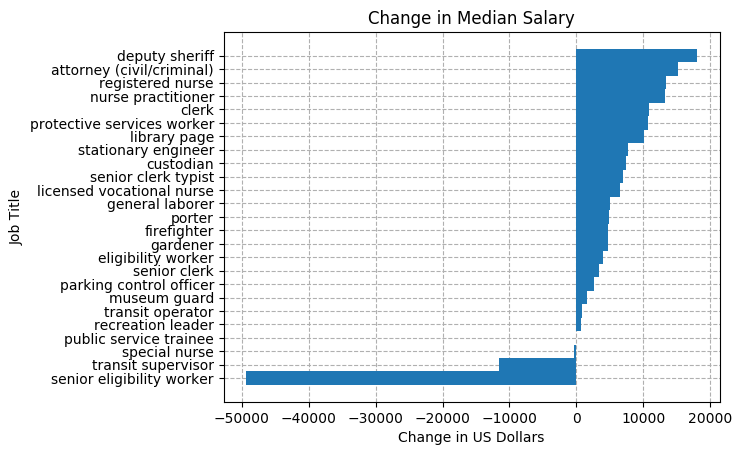

In [146]:
# For this problem, I looked at the median pay of total pay, not total pay with benefits. I also ignored any proffesion that did
# not have data for both 2011 and 2014. My approach was as follows. First, I imported the CSV data into a 2d list. Then,
# I created a dictionary that had the job titles as keys and a list of people with that job as the values. Next, I went through
# the dictionary and changed the valued to a list containing the changed in median pay for that job and the number of people with
# that job. I did this by creating lists of pay for each job for 2011 and 2014 while summing the number of people, and using 
# numpy to compute the change in median pay. I then transformed the dictionary into a list and then into a pandas dataframe so
# that I could sort it by number of people, grab only the top 25, and then sort that by the change in median pay. After that, I
# used code I found on stack overflow to actually create a plot using matplotlib.
# I am aware that I could have used a pandas dataframe to do this a bit easier, but I was unsure how to go from a 2d list to 
# a datafram so I just did it this way instead.
# I am also aware that it is hard to distinguish between bars. Not sure how to add space between them, everything I looked up
# seemed overly complicated, so I just added dashed lines so it was actually possible to figure out which bar was for which job
import csv
import numpy
import math
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
def median_sf_salaries_change(filename):
    # Import the salary data
    with open(filename) as f:
        csv_reader = csv.reader(f)
        salary_data = list(csv_reader)
    # Create a dictionary that has job title as a key and a list of people as the values
    job_dict = {}
    for person in salary_data[1:]:
        if (person[2].lower() in job_dict.keys()):
            job_dict[person[2].lower()].append(person)
        else:
            job_dict[person[2].lower()] = [person]
    # Change the value associated with the keys (profession title) to the change in median pay of that key and the number of
    # people in that proffesion
    for proffesion in job_dict.keys():
        person_list = job_dict[proffesion]
        salary_list_2011 = []
        salary_list_2014 = []
        # Create a list of all of the salaries for 2011 and 2014 for this proffesion
        num_people = 0
        for person in person_list:
            num_people += 1
            if (person[9] == '2011'):
                salary_list_2011.append(float(person[7]))
            elif (person[9] == '2014'):
                salary_list_2014.append(float(person[7]))
        # Get the change in median pay
        if (len(salary_list_2011) != 0 and len(salary_list_2014) != 0):
            median_2011 = numpy.median(salary_list_2011)
            median_2014 = numpy.median(salary_list_2014)
            change = median_2014 - median_2011
            # Update the key's value
            job_dict[proffesion] = [change, num_people]
        else:
            job_dict[proffesion] = [float('NaN'), num_people]
    job_list = []
    # Transform my data from a dictionary to a list
    for key in job_dict.keys():
        if (not math.isnan(job_dict[key][0])):
            job_list.append([str(key), job_dict[key][0], job_dict[key][1]])
    # Temorarily transform my data into a pandas datafram to sort it and grab the 25 jobs with the most people
    job_list = pd.DataFrame(job_list).sort_values(2, ascending=False)[:25].sort_values(1, ascending=True)
    # Create my lists of values and labels for my bar plot
    labels = list(job_list[0])
    values = list(job_list[1])

    # Was not sure how to plot, so from this point forward much of the code is from:
    # https://stackoverflow.com/questions/34029865/how-to-plot-bar-chart-for-a-list-in-python
    xs = numpy.arange(len(labels)) 
    width = 1
    plt.yticks(xs, labels)
    plt.grid(zorder=0, linestyle="dashed")
    plt.barh(xs, values, width, align='center', zorder=5)
    plt.title("Change in Median Salary")
    plt.xlabel("Change in US Dollars")
    plt.ylabel("Job Title")
    
    plt.show()
    
median_sf_salaries_change('Salaries.csv')

## Problem 3: Airline Tweets
** 3 points **

Given a dataset of Tweets regarding different airlines (`Tweets.csv`), write a function that returns an ordered list of the most serious complaints against each airline.

**Note:** The sentiment analysis has already been performed, and you are given a sentiment score, complaint label (`negativearesas`), and complaint label confidence markers for each tweet. For maximum accuracy, you may wish to utilize all three of these values in your analysis.

(Data courtesy of https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

In [ ]:
!head Tweets.csv

In [ ]:
def airline_complaints(filename, airline):
    pass

airline_complaints('Tweets.csv', 'American')

## Problem 4: City Name Cleaning
** 3 points**

Suppose you have a very large list of the names of all large cities in the world. (Number of records ~= 100,000) Many of these cities will contain common overlapping words like “Mobile”, “Rugby” or “Salmon”. Your task is to automatically (and hopefully quickly) filter out as many of these 'common' words as possible. Output a list of world cities that have these common words removed.

Unfortunately, we don't have a clean list of cities, but rather a `*.csv` file that contains a bunch of other information. You can find this file in `worldcities.csv`

(Data courtesy of https://www.maxmind.com/en/free-world-cities-database)

In [ ]:
!tail worldcities.csv

In [ ]:
def city_name_cleanser(filename):
    pass

city_name_cleanser('worldcities.csv')

## Problem 5: IMDB Crawler
** 3 points **

In an earlier challange problem, you wrote code to take an IMDB page and parse out specific information about the movie and cast.

In this problem, you will go a step further and write a web-scraper to build a database of movie information.

Write a function that takes as an argument a 'seed' URL (guaranteed to be somewhere on www.imdb.com) and crawls the movie links that it finds on that page. You should save the following characteristics about each movie:

* Title
* Rating
* Duration
* Release Date
* Budget

For the sake of time, you can also **limit your crawler to scraping and saving 25 movies.**

The function should save the data to a JSON file.

** Note: ** You're encouraged to separate your code into function(s) that scrape data from IMDB, and function(s) that perform the crawling logic.

In [ ]:
def imdb_crawler(seed_url, out_file):
    pass

imdb_crawler('http://www.imdb.com/', 'movies.json')